# Business Understanding
During the FIFA World Cup, various sports events are held, one of which is World Cup Matches. The World Cup Matches dataset contains information about football matches that occurred during the FIFA World Cup from 1930 to 2014.

Source Data: https://www.kaggle.com/datasets/abecklas/fifa-world-cup 

**Business Questions:** Based on the dataset, several questions arise:
1. What is the distribution of teams scoring goals while hosting matches in 2014 (showing the top 5 data)?
2. What is the total attendance in 2014 based on the stadium?
3. How many matches ended in a draw in 2014?
4. What is the distribution of match results based on the 'win condition'?
5. Which stadiums were frequently used during the World Cup matches in 2014 (showing the top 5 data)?

# Data Understanding
Data Understanding contains information about the existing dataset, explanations regarding its columns, whether the dataset is complete or not, and other relevant details.

**Insights and Considerations** 
- This dataset spans from 1930 to 2014. 
- The total number of rows in this dataset is 4572, while there are 20 columns. 
- All columns have missing values, with 'Attendance' having the highest number of missing values, totaling 3722.
**Columns**
- **Year:** The year of the match. 
- **Home Team Name:** The name of the home team. 
- **Away Team Name:** The name of the away team.
- **Home Team Goals:** The score of the match and the performance of the home team in scoring goals.
- **Away Team Goals:** The score of the match and the performance of the away team in scoring goals.
- **Attendance:** The number of spectators in the match.
- **Datetime:** The date and time of the match. (to be manipulated later)
- **Half-time Home Goals:** The number of goals scored by the home team in the first half.
- **Half-time Away Goals:** The number of goals scored by the away team in the first half.
- **City:** The city where the match took place.
- **Stadium:** The name of the stadium where the match took place.
- **Stage:** The stage or phase of the tournament.
- **RoundID:** The ID of the tournament round.
- **MatchID:** The ID of the match.
- **Win conditions:** The conditions for winning the match.
- **Referee:** The name of the match referee.
- **Assistant** 1: The name of the first assistant referee.
- **Assistant** 2: The name of the second assistant referee.
- **Home Team Initials:** The initials of the home team.
- **Away Team Initials:** The initials of the away team.

# Data Preparation

- Check data conditions: Determine the number of columns and rows, and inspect whether all columns are fulfilled or not. Also, examine the data types of each column to ensure their correctness.
- Check and remove duplicate rows from the dataframe: After examining the data, it was found that there are 3,735 duplicate rows, out of which 3,720 are NaN data. Upon further investigation, it was confirmed that 15 of the duplicates were indeed duplicate data, so these 15 duplicate rows were dropped. The 3,720 NaN rows were also dropped as they were empty after a thorough check of the entire dataset.
- Some data types in certain columns are incorrect. Therefore, data type conversion was performed: changing the dtype of 'Year' from float to int, changing the dtype of 'Datetime' from object to datetime, changing the dtype of 'Home Team Goals' from object to int, changing the dtype of 'Away Team Goals' from float to int, changing the dtype of 'Attendance' from float to int, changing the dtype of 'Half-time Home Goals' from float to int, changing the dtype of 'Half-time Away Goals' from float to int, changing the dtype of 'RoundID' from float to int, and changing the dtype of 'MatchID' from float to int.
- Upon checking missing values, it was found that there are 10 missing values in the 'Datetime' column.
- Handling missing values: Imputation was performed on the 'Datetime' column, which still had missing values because the percentage of missing values was 1.19%. After imputation, all columns were fulfilled with 835 non-null values.

## Python Libraries Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Load Data Set
Create a data frame then load the data set. Here the dataset used is WorldCupMatches

In [2]:
#Load data

df = pd.read_csv('WorldCupMatches.csv')

Display the data set that has been loaded

In [3]:
df.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


## Data Cleansing
### Check Data Condition

In [4]:
df.shape

(4572, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

From the description, we can see that some columns have fewer non-null values than the total entries (4572), indicating the presence of null or empty values in the DataFrame. Additionally, we can also observe the data types of each column, where there are columns whose data types are not yet appropriate.

## Check and remove duplicate rows from theData Frame
### keep
- {‘first’, ‘last’, False}, default ‘first’
- Determines which duplicates (if any) to mark.
- first : Mark duplicates as True except for the first occurrence.
- last : Mark duplicates as True except for the last occurrence.
- False : Mark all duplicates as True.

In [6]:
df[df.duplicated(keep='first')]

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
836,2014.0,28 Jun 2014 - 13:00,Round of 16,Estadio Mineirao,Belo Horizonte,Brazil,1.0,1.0,Chile,Brazil win on penalties (3 - 2),57714.0,0.0,0.0,WEBB Howard (ENG),MULLARKEY Michael (ENG),Darren CANN (ENG),255951.0,300186487.0,BRA,CHI
837,2014.0,28 Jun 2014 - 17:00,Round of 16,Estadio do Maracana,Rio De Janeiro,Colombia,2.0,0.0,Uruguay,,73804.0,1.0,0.0,Bj�rn KUIPERS (NED),Sander VAN ROEKEL (NED),Erwin ZEINSTRA (NED),255951.0,300186491.0,COL,URU
838,2014.0,29 Jun 2014 - 13:00,Round of 16,Estadio Castelao,Fortaleza,Netherlands,2.0,1.0,Mexico,,58817.0,0.0,0.0,PROENCA Pedro (POR),MIRANDA Bertino (POR),TRIGO Jose (POR),255951.0,300186508.0,NED,MEX
839,2014.0,29 Jun 2014 - 17:00,Round of 16,Arena Pernambuco,Recife,Costa Rica,1.0,1.0,Greece,Costa Rica win on penalties (5 - 3),41242.0,0.0,0.0,Ben WILLIAMS (AUS),CREAM Matthew (AUS),ANAZ Hakan (AUS),255951.0,300186459.0,CRC,GRE
840,2014.0,30 Jun 2014 - 13:00,Round of 16,Estadio Nacional,Brasilia,France,2.0,0.0,Nigeria,,67882.0,0.0,0.0,GEIGER Mark (USA),HURD Sean (USA),FLETCHER Joe (CAN),255951.0,300186462.0,FRA,NGA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df[df.duplicated(keep='last')]

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
820,2014.0,28 Jun 2014 - 13:00,Round of 16,Estadio Mineirao,Belo Horizonte,Brazil,1.0,1.0,Chile,Brazil win on penalties (3 - 2),57714.0,0.0,0.0,WEBB Howard (ENG),MULLARKEY Michael (ENG),Darren CANN (ENG),255951.0,300186487.0,BRA,CHI
821,2014.0,28 Jun 2014 - 17:00,Round of 16,Estadio do Maracana,Rio De Janeiro,Colombia,2.0,0.0,Uruguay,,73804.0,1.0,0.0,Bj�rn KUIPERS (NED),Sander VAN ROEKEL (NED),Erwin ZEINSTRA (NED),255951.0,300186491.0,COL,URU
822,2014.0,30 Jun 2014 - 13:00,Round of 16,Estadio Nacional,Brasilia,France,2.0,0.0,Nigeria,,67882.0,0.0,0.0,GEIGER Mark (USA),HURD Sean (USA),FLETCHER Joe (CAN),255951.0,300186462.0,FRA,NGA
823,2014.0,30 Jun 2014 - 17:00,Round of 16,Estadio Beira-Rio,Porto Alegre,Germany,2.0,1.0,Algeria,Germany win after extra time,NaN,0.0,0.0,RICCI Sandro (BRA),DE CARVALHO Emerson (BRA),VAN GASSE Marcelo (BRA),255951.0,300186460.0,GER,ALG
824,2014.0,04 Jul 2014 - 17:00,Quarter-finals,Estadio Castelao,Fortaleza,Brazil,2.0,1.0,Colombia,,60342.0,1.0,0.0,Carlos VELASCO CARBALLO (ESP),ALONSO FERNANDEZ Roberto (ESP),YUSTE Juan (ESP),255953.0,300186461.0,BRA,COL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.duplicated().sum()

3735

Count duplicate is 3735

Remove these duplicate rows to ensure data integrity and accuracy.

Due to the presence of numerous NaN values, our first step will be to drop rows containing NaN values.

In [9]:
df.dropna(inplace=True)
df.duplicated().sum()

15

In [10]:
df[df.duplicated(keep='first')]

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
836,2014.0,28 Jun 2014 - 13:00,Round of 16,Estadio Mineirao,Belo Horizonte,Brazil,1.0,1.0,Chile,Brazil win on penalties (3 - 2),57714.0,0.0,0.0,WEBB Howard (ENG),MULLARKEY Michael (ENG),Darren CANN (ENG),255951.0,300186487.0,BRA,CHI
837,2014.0,28 Jun 2014 - 17:00,Round of 16,Estadio do Maracana,Rio De Janeiro,Colombia,2.0,0.0,Uruguay,,73804.0,1.0,0.0,Bj�rn KUIPERS (NED),Sander VAN ROEKEL (NED),Erwin ZEINSTRA (NED),255951.0,300186491.0,COL,URU
838,2014.0,29 Jun 2014 - 13:00,Round of 16,Estadio Castelao,Fortaleza,Netherlands,2.0,1.0,Mexico,,58817.0,0.0,0.0,PROENCA Pedro (POR),MIRANDA Bertino (POR),TRIGO Jose (POR),255951.0,300186508.0,NED,MEX
839,2014.0,29 Jun 2014 - 17:00,Round of 16,Arena Pernambuco,Recife,Costa Rica,1.0,1.0,Greece,Costa Rica win on penalties (5 - 3),41242.0,0.0,0.0,Ben WILLIAMS (AUS),CREAM Matthew (AUS),ANAZ Hakan (AUS),255951.0,300186459.0,CRC,GRE
840,2014.0,30 Jun 2014 - 13:00,Round of 16,Estadio Nacional,Brasilia,France,2.0,0.0,Nigeria,,67882.0,0.0,0.0,GEIGER Mark (USA),HURD Sean (USA),FLETCHER Joe (CAN),255951.0,300186462.0,FRA,NGA
842,2014.0,01 Jul 2014 - 13:00,Round of 16,Arena de Sao Paulo,Sao Paulo,Argentina,1.0,0.0,Switzerland,Argentina win after extra time,63255.0,0.0,0.0,ERIKSSON Jonas (SWE),KLASENIUS Mathias (SWE),WARNMARK Daniel (SWE),255951.0,300186503.0,ARG,SUI
843,2014.0,01 Jul 2014 - 17:00,Round of 16,Arena Fonte Nova,Salvador,Belgium,2.0,1.0,USA,Belgium win after extra time,51227.0,0.0,0.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255951.0,300186497.0,BEL,USA
844,2014.0,04 Jul 2014 - 13:00,Quarter-finals,Estadio do Maracana,Rio De Janeiro,France,0.0,1.0,Germany,,74240.0,0.0,1.0,PITANA Nestor (ARG),MAIDANA Hernan (ARG),BELATTI Juan Pablo (ARG),255953.0,300186485.0,FRA,GER
845,2014.0,04 Jul 2014 - 17:00,Quarter-finals,Estadio Castelao,Fortaleza,Brazil,2.0,1.0,Colombia,,60342.0,1.0,0.0,Carlos VELASCO CARBALLO (ESP),ALONSO FERNANDEZ Roberto (ESP),YUSTE Juan (ESP),255953.0,300186461.0,BRA,COL
846,2014.0,05 Jul 2014 - 13:00,Quarter-finals,Estadio Nacional,Brasilia,Argentina,1.0,0.0,Belgium,,68551.0,1.0,0.0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255953.0,300186504.0,ARG,BEL


In [11]:
df[df.duplicated(keep='last')]

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
820,2014.0,28 Jun 2014 - 13:00,Round of 16,Estadio Mineirao,Belo Horizonte,Brazil,1.0,1.0,Chile,Brazil win on penalties (3 - 2),57714.0,0.0,0.0,WEBB Howard (ENG),MULLARKEY Michael (ENG),Darren CANN (ENG),255951.0,300186487.0,BRA,CHI
821,2014.0,28 Jun 2014 - 17:00,Round of 16,Estadio do Maracana,Rio De Janeiro,Colombia,2.0,0.0,Uruguay,,73804.0,1.0,0.0,Bj�rn KUIPERS (NED),Sander VAN ROEKEL (NED),Erwin ZEINSTRA (NED),255951.0,300186491.0,COL,URU
822,2014.0,30 Jun 2014 - 13:00,Round of 16,Estadio Nacional,Brasilia,France,2.0,0.0,Nigeria,,67882.0,0.0,0.0,GEIGER Mark (USA),HURD Sean (USA),FLETCHER Joe (CAN),255951.0,300186462.0,FRA,NGA
824,2014.0,04 Jul 2014 - 17:00,Quarter-finals,Estadio Castelao,Fortaleza,Brazil,2.0,1.0,Colombia,,60342.0,1.0,0.0,Carlos VELASCO CARBALLO (ESP),ALONSO FERNANDEZ Roberto (ESP),YUSTE Juan (ESP),255953.0,300186461.0,BRA,COL
825,2014.0,04 Jul 2014 - 13:00,Quarter-finals,Estadio do Maracana,Rio De Janeiro,France,0.0,1.0,Germany,,74240.0,0.0,1.0,PITANA Nestor (ARG),MAIDANA Hernan (ARG),BELATTI Juan Pablo (ARG),255953.0,300186485.0,FRA,GER
826,2014.0,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER
827,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED
828,2014.0,13 Jul 2014 - 16:00,Final,Estadio do Maracana,Rio De Janeiro,Germany,1.0,0.0,Argentina,Germany win after extra time,74738.0,0.0,0.0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255959.0,300186501.0,GER,ARG
829,2014.0,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),63267.0,0.0,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG
830,2014.0,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0.0,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC


In [12]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [13]:
df.shape  # Check the shape of the DataFrame after removing duplicates

(835, 20)

## Convert Dtype
Converting data types ensures that the data is in the correct format for analysis and allows for more efficient and accurate data processing.

In [14]:
# Replacing non-finite values with valid ones (e.g., 0)
df['Year'] = df['Year'].fillna(0).astype(int)
df['Home Team Goals'] = df['Home Team Goals'].fillna(0).astype(int)
df['Away Team Goals'] = df['Away Team Goals'].fillna(0).astype(int)
df['Attendance'] = df['Attendance'].fillna(0).astype(int)
df['Half-time Home Goals'] = df['Half-time Home Goals'].fillna(0).astype(int)
df['Half-time Away Goals'] = df['Half-time Away Goals'].fillna(0).astype(int)
df['RoundID'] = df['RoundID'].fillna(0).astype(int)
df['MatchID'] = df['MatchID'].fillna(0).astype(int)
df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')

In [15]:
# Deleting rows containing non-finite values while changing the data type.
df = df.dropna(subset=['Year'])
df['Year'] = df['Year'].astype(int)
df = df.dropna(subset=['Home Team Goals'])
df['Home Team Goals'] = df['Home Team Goals'].astype(int)
df = df.dropna(subset=['Away Team Goals'])
df['Away Team Goals'] = df['Away Team Goals'].astype(int)
df = df.dropna(subset=['Attendance'])
df['Attendance'] = df['Attendance'].astype(int)
df = df.dropna(subset=['Half-time Home Goals'])
df['Half-time Home Goals'] = df['Half-time Home Goals'].astype(int)
df = df.dropna(subset=['Half-time Away Goals'])
df['Half-time Away Goals'] = df['Half-time Away Goals'].astype(int)
df = df.dropna(subset=['RoundID'])
df['RoundID'] = df['RoundID'].astype(int)
df = df.dropna(subset=['MatchID'])
df['MatchID'] = df['MatchID'].astype(int)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 835 entries, 0 to 835
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Year                  835 non-null    int64         
 1   Datetime              825 non-null    datetime64[ns]
 2   Stage                 835 non-null    object        
 3   Stadium               835 non-null    object        
 4   City                  835 non-null    object        
 5   Home Team Name        835 non-null    object        
 6   Home Team Goals       835 non-null    int64         
 7   Away Team Goals       835 non-null    int64         
 8   Away Team Name        835 non-null    object        
 9   Win conditions        835 non-null    object        
 10  Attendance            835 non-null    int64         
 11  Half-time Home Goals  835 non-null    int64         
 12  Half-time Away Goals  835 non-null    int64         
 13  Referee               835

## Check Percentage Missing Values
checking the percentage of missing values provides valuable insights into the data quality and guides decision-making regarding data preprocessing and analysis strategies.

In [17]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values/len(df)) * 100
missing_info = pd.DataFrame({
    'Column' : missing_values.index,
    'Missing Values' : missing_values.values,
    'Missing Percentage' : missing_percentage.values
})
print(missing_info)

                  Column  Missing Values  Missing Percentage
0                   Year               0            0.000000
1               Datetime              10            1.197605
2                  Stage               0            0.000000
3                Stadium               0            0.000000
4                   City               0            0.000000
5         Home Team Name               0            0.000000
6        Home Team Goals               0            0.000000
7        Away Team Goals               0            0.000000
8         Away Team Name               0            0.000000
9         Win conditions               0            0.000000
10            Attendance               0            0.000000
11  Half-time Home Goals               0            0.000000
12  Half-time Away Goals               0            0.000000
13               Referee               0            0.000000
14           Assistant 1               0            0.000000
15           Assistant 2

It turns out that only the 'Datetime' column has missing values. Although the number of missing values is not significant, considering that 'Datetime' is a crucial column for analysis, we have decided to retain the missing values in the 'Datetime' column.

In [18]:
df.Datetime.value_counts()

Datetime
1934-05-27 16:30:00    8
1958-06-15 19:00:00    7
1958-06-11 19:00:00    7
1958-06-08 19:00:00    7
1970-06-07 12:00:00    4
                      ..
1994-06-21 16:00:00    1
1994-06-21 19:30:00    1
1994-06-21 12:30:00    1
1994-06-20 16:00:00    1
2014-07-01 17:00:00    1
Name: count, Length: 591, dtype: int64

In [19]:
df_sorted = df.sort_values(by='Datetime', ascending=True)
print(df_sorted)

     Year            Datetime        Stage                   Stadium  \
0    1930 1930-07-13 15:00:00      Group 1                   Pocitos   
1    1930 1930-07-13 15:00:00      Group 4            Parque Central   
2    1930 1930-07-14 12:45:00      Group 2            Parque Central   
3    1930 1930-07-14 14:50:00      Group 3                   Pocitos   
4    1930 1930-07-15 16:00:00      Group 1            Parque Central   
..    ...                 ...          ...                       ...   
592  2002                 NaT      Group H      Saitama Stadium 2002   
602  2002                 NaT      Group B  Jeonju World Cup Stadium   
605  2002                 NaT      Group G           Kashima Stadium   
613  2002                 NaT      Group A   Suwon World Cup Stadium   
633  2002                 NaT  Round of 16  Jeonju World Cup Stadium   

            City Home Team Name  Home Team Goals  Away Team Goals  \
0    Montevideo          France                4                1 

In [20]:
df.Datetime.value_counts()

Datetime
1934-05-27 16:30:00    8
1958-06-15 19:00:00    7
1958-06-11 19:00:00    7
1958-06-08 19:00:00    7
1970-06-07 12:00:00    4
                      ..
1994-06-21 16:00:00    1
1994-06-21 19:30:00    1
1994-06-21 12:30:00    1
1994-06-20 16:00:00    1
2014-07-01 17:00:00    1
Name: count, Length: 591, dtype: int64

In [21]:
df['Datetime'] = df['Datetime'].fillna(method='backfill')

/var/folders/9v/jr522vfx6hvf7snl2zzlk8r40000gn/T/ipykernel_89447/1218265266.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Datetime'] = df['Datetime'].fillna(method='backfill')


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 835 entries, 0 to 835
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Year                  835 non-null    int64         
 1   Datetime              835 non-null    datetime64[ns]
 2   Stage                 835 non-null    object        
 3   Stadium               835 non-null    object        
 4   City                  835 non-null    object        
 5   Home Team Name        835 non-null    object        
 6   Home Team Goals       835 non-null    int64         
 7   Away Team Goals       835 non-null    int64         
 8   Away Team Name        835 non-null    object        
 9   Win conditions        835 non-null    object        
 10  Attendance            835 non-null    int64         
 11  Half-time Home Goals  835 non-null    int64         
 12  Half-time Away Goals  835 non-null    int64         
 13  Referee               835

## Data Manipulation
Data manipulation involves making changes to the dataset to prepare it for analysis or to extract valuable insights. This process includes tasks such as cleaning the data, transforming its structure, creating new features, and aggregating information.
### Drop Non-Essential Columns
This step involves removing columns from the dataset that are deemed non-essential for the analysis. Non-essential columns are those that do not contribute significantly to the analysis or do not align with the research objectives. By dropping these columns, we can streamline the dataset and focus only on the most relevant features.

In [23]:
df.drop(['Referee', 'Assistant 1', 'Assistant 2', 'Home Team Initials', 'Away Team Initials'], 
        axis = 1, inplace=True)
df.columns

Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'RoundID', 'MatchID'],
      dtype='object')

We drop columns such as 'Referee', 'Assistant 1', 'Assistant 2', 'Home Team Initials', and 'Away Team Initials' as they are not critical for the analysis at hand.

### Make Column Draw, Date, and Time
We will perform data manipulation here. Manipulation here does not involve altering data values but rather restructuring the data to make it easier for machines to read.

To determine whether a match ended in a draw or not, we can use the "Home Team Goals" and "Away Team Goals" columns.

In [24]:
# We'll create a new column to indicate whether the match ended in a draw or not.
df['Draw'] = df['Home Team Goals'] == df['Away Team Goals']

# We'll change the values in the "Draw" column to True or False.
df['Draw'] = df['Draw'].astype(str).replace({'True': 'Yes', 'False': 'No'})

# Display the manipulation result
print(df[['Home Team Goals', 'Away Team Goals', 'Draw']].head())

   Home Team Goals  Away Team Goals Draw
0                4                1   No
1                3                0   No
2                2                1   No
3                3                1   No
4                1                0   No


In [26]:
df['Tanggal'] = df['Datetime'].dt.date
df['Waktu'] = df['Datetime'].dt.time
df.head()

# Changing the date format to "day - month"
df['Tanggal'] = df['Datetime'].dt.strftime('%d - %b')

# Example to display the manipulation result
print(df[['Datetime', 'Tanggal']].head())

             Datetime   Tanggal
0 1930-07-13 15:00:00  13 - Jul
1 1930-07-13 15:00:00  13 - Jul
2 1930-07-14 12:45:00  14 - Jul
3 1930-07-14 14:50:00  14 - Jul
4 1930-07-15 16:00:00  15 - Jul


In [27]:
df.drop(columns=['Datetime'], inplace=True)
df.rename(columns={'Tanggal': 'Date'}, inplace=True)
df.rename(columns={'Waktu': 'Time'}, inplace=True)

In [28]:
df.head()

,Year,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID,Draw,Date,Time
0,1930,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444,3,0,201,1096,No,13 - Jul,15:00:00
1,1930,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346,2,0,201,1090,No,13 - Jul,15:00:00
2,1930,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059,2,0,201,1093,No,14 - Jul,12:45:00
3,1930,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549,1,0,201,1098,No,14 - Jul,14:50:00
4,1930,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409,0,0,201,1085,No,15 - Jul,16:00:00


# Modeling
## 1. Who are the top five teams that scored the most goals when hosting matches in 2014?

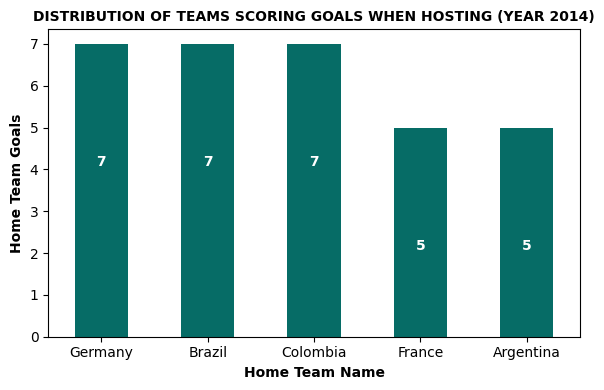

In [29]:
# Filter DataFrame based on the year 2014
filtered_df = df[(df['Year'] == 2014)]

# Group data by home team name and sum up the home team goals
total_home_team_goals = filtered_df.groupby('Home Team Name')['Home Team Goals'].sum()

# Sort and take the top 5 values
total_home_team_goals = total_home_team_goals.sort_values(ascending=True).tail(5)

# Plot bar with the requested order
ax = total_home_team_goals[::-1].plot(kind='bar', figsize=(6,4), color='#066C66')  # Using [::-1] to reverse the order

# Add labels and title in uppercase and bold
plt.xlabel('Home Team Name', fontweight='bold')
plt.ylabel('Home Team Goals', fontweight='bold')
plt.title('DISTRIBUTION OF TEAMS SCORING GOALS WHEN HOSTING (YEAR 2014)', fontweight='bold',  fontsize=10)
plt.xticks(rotation=0)

# Add numbers within the graph
for i, v in enumerate(total_home_team_goals[::-1]):
    ax.text(i, v-3, str(v), ha='center', va='bottom', fontweight='bold',color='white')

# Show the plot
plt.tight_layout()
plt.show()

Based on the data in the above graph, the top 5 data for the year 2014 indicate that teams from **Germany, Brazil, and Colombia have the same distribution, which is 7. This means that these countries scored a total of 7 goals each in 2014.** Meanwhile, France and Argentina have the same distribution level, which is 5. This implies that **France and Argentina scored a total of 5 goals each in 2014.**

## 2. What is the total attendance in 2014 based on the stadium?

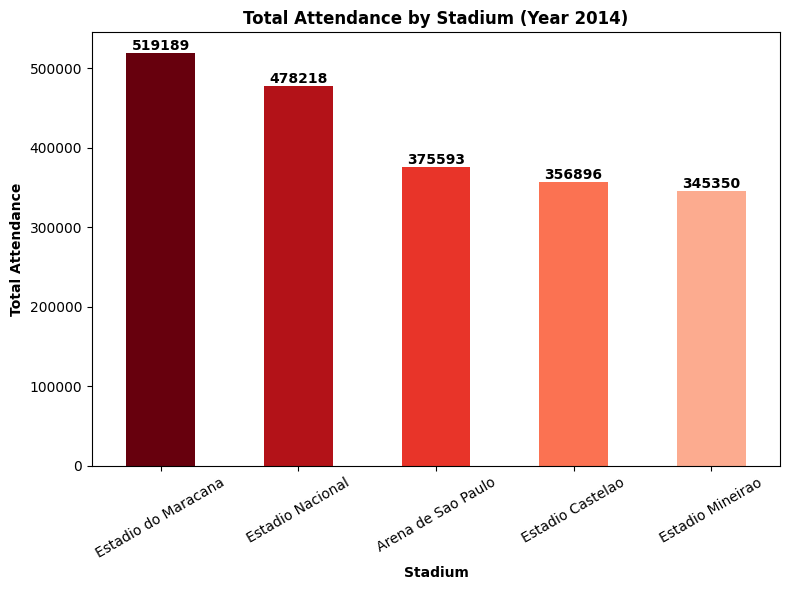

In [30]:
# Filter DataFrame based on the year 2014
filtered_df = df[df['Year'] == 2014]

# Group data by stadium and sum up the attendance
total_attendance_by_stadium = filtered_df.groupby('Stadium')['Attendance'].sum()

# Sort and take the top 5 values
total_attendance_by_stadium = total_attendance_by_stadium.sort_values(ascending=False).head(5)  # Sorting in reverse and taking the top 5 values

# Create a colormap in shades of pink
colors = plt.cm.Reds(np.linspace(0.3, 1, len(total_attendance_by_stadium)))  # using Reds colormap, starting from the darkest color

# Plot bar
ax = total_attendance_by_stadium.plot(kind='bar', figsize=(8, 6), color=colors[::-1])  # vertical bar with reversed color order
# Add labels and title
plt.xlabel('Stadium', fontweight='bold')
plt.ylabel('Total Attendance', fontweight='bold')
plt.title('Total Attendance by Stadium (Year 2014)', fontweight='bold')
plt.xticks(rotation=30)

# Add numbers within the graph
for i, v in enumerate(total_attendance_by_stadium):
    ax.text(i, v, str(v), ha='center', va='bottom', rotation=0, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

Based on the above graph, it is evident that **the highest total attendance in 2014 was recorded at Estadio do Maracana, with a total of 519,189 spectators.** Meanwhile, **the fifth highest position is held by Estadio Mineirao with an attendance of 345,350 spectators.**

## 3. How many matches ended in a draw in 2014? 

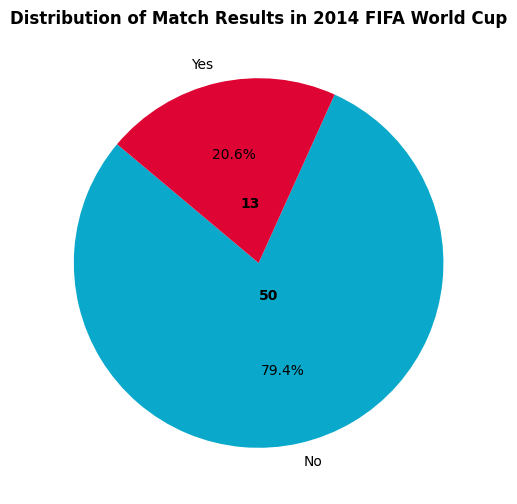

In [32]:
# Determine the size of the image (figsize)
plt.figure(figsize=(6, 6))

# Filter DataFrame for the year 2014
df_2014 = df[df['Year'] == 2014]

# Count the number of draw matches and non-draw matches
draw_counts = df_2014['Draw'].value_counts()

# Colors for each part of the pie chart
colors = ['#0AA9CB', '#DE0534']

# Visualize the distribution of match results in a pie chart
plt.pie(draw_counts.values, labels=draw_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Distribution of Match Results in 2014 FIFA World Cup', fontweight='bold')

# Add the number of matches around each part of the pie chart
for i, v in enumerate(draw_counts.values):
    if i == 0:
        plt.text(i+0.001, -0.2, f"{v}", fontsize=10, fontweight='bold', color='black')
    else:
        plt.text(i-1.1, +0.3, f"{v}", fontsize=10, fontweight='bold', color='black')

# Show the pie chart
plt.show()

Based on the data presented, there are two main categories for the outcomes of football matches: **"No" (not drawn) and "Yes" (drawn).** Out of 63 matches in the year 2014, a total of **50 matches (approximately 79.4%) ended without a draw**, while only **13 matches (approximately 20.6%) resulted in a draw.** From this, it can be concluded that **draw results tend to be less frequent occurrences in football matches**, with the majority of matches tending to produce a clear winner without the need for extra time or penalty shootouts.

## 4. What is the distribution of match results based on the 'win condition'?

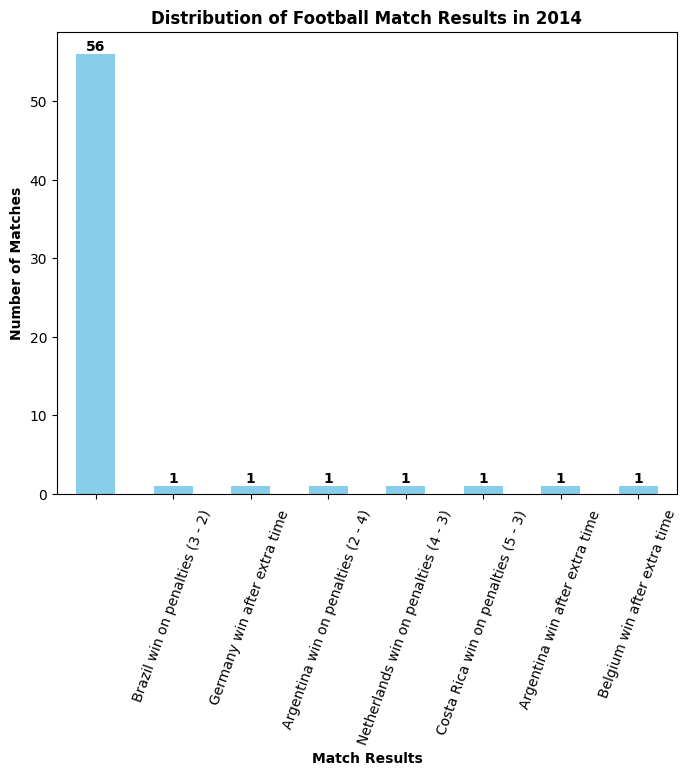

In [33]:
# Get data for the year 2014
df_2014 = df[df['Year'] == 2014]

# Count the distribution of match results
results_distribution_2014 = df_2014['Win conditions'].value_counts()

# Make a visualization of the distribution of match results
ax = results_distribution_2014.plot(kind='bar', figsize=(8,6), color='skyblue')
plt.title('Distribution of Football Match Results in 2014', fontweight='bold')
plt.xlabel('Match Results', fontweight='bold')
plt.ylabel('Number of Matches', fontweight='bold')
plt.xticks(rotation=70)

# Add numbers within the graph
for i, v in enumerate(results_distribution_2014):
    ax.text(i, v, str(v), ha='center', va='bottom', rotation=0, fontweight='bold')
    
plt.show()

Out of 63 matches in 2014, **56 matches ended without any special conditions**, meaning there were no draws and no need for extra time or penalties. Meanwhile, **7 other matches had victory conditions, such as Brazil winning through a penalty shootout (3-2), Germany winning in extra time, and Argentina winning through a penalty shootout (2-4).** These matches occurred during the group stage and ended in a draw, thus requiring extra time and penalties to determine the winner.

## 5. Which stadium was most frequently used during matches in 2014?

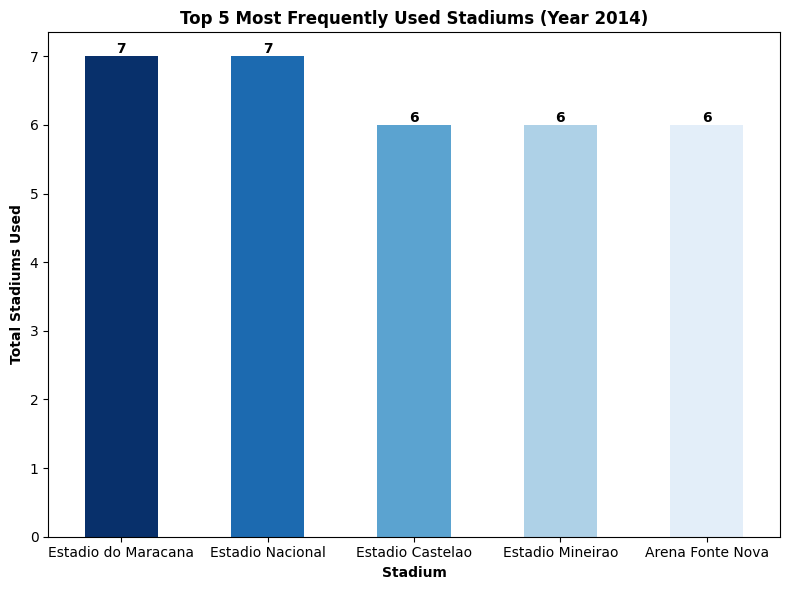

In [34]:
# Filter DataFrame for the year 2014
filtered_df = df[df['Year'] == 2014]

# Count the stadiums used in 2014
top_stadiums = df_2014['Stadium'].value_counts()

# Sort and take the top 5 values
top_stadiums = top_stadiums.sort_values(ascending=True).tail(5)

# Create a colormap in shades of blue
colors = plt.cm.Blues(np.linspace(0.1, 1, len(top_stadiums)))[::-1]    # using Blues colormap

# Plot bar
ax = top_stadiums[::-1].plot(kind='bar', figsize=(8, 6), color=colors)  # horizontal bar

# Add labels and title
plt.ylabel('Total Stadiums Used', fontweight='bold')
plt.xlabel('Stadium', fontweight='bold')
plt.title('Top 5 Most Frequently Used Stadiums (Year 2014)', fontweight='bold')
plt.xticks(rotation=0)

# Add numbers within the graph
for i, v in enumerate(top_stadiums[::-1]):
    ax.text(i, v, str(v), ha='center', va='bottom', rotation=0, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

From the data above, it can be observed that the top 5 stadiums with **the highest usage in 2014 were Estadio Maracana and Estadio Nacional, each being used 7 times.** These stadiums are well-known for their large capacity and being located in major cities, making them easily accessible for teams, fans, and media.

# Evaluation
- The distribution of teams scoring goals when playing at home in 2014 is dominated by teams from Germany, Brazil, and Colombia, each with a distribution of 7.
- Estadio do Maracana is the stadium with the highest total attendance, hosting 519,189 spectators.
- There are two main categories for the outcomes of football matches: "No" (not drawn) and "Yes" (drawn). Out of 63 matches played in 2014, 50 ended without a draw, while the remaining 13 ended in a draw.
- Out of 63 matches in 2014, 56 ended without any special conditions, meaning there were no draws and no need for extra time or penalties. Meanwhile, 7 other matches had specific winning conditions.
- Estadio Maracana and Estadio Nacional are the stadiums most frequently used in FIFA World Cup matches, each being used 7 times in 2014.